### Import dependencies

In [63]:
# Import libraries for model building
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


### Load data

In [64]:
train_df = pd.read_csv("../data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explore training dataset

In [65]:
# Check train data 
train_df.info()
train_df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Explore test dataset

In [66]:
test_df = pd.read_csv("../data/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
# Check test data
test_df.info()
test_df.isnull().sum()


<class 'pandas.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    str    
 3   Sex          418 non-null    str    
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    str    
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     str    
 10  Embarked     418 non-null    str    
dtypes: float64(2), int64(4), str(5)
memory usage: 36.1 KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

*** EDA ***
- Both training and test datasets have quite a lot of missing values in 'age', 'cabin' in training dataset, and a lot of missing values in 'age' and 'cabin' in test dataset. Datasets have a few missing values in 'fare' and port of embarkation.
- 'Age' is important as it is a strong survival predictor (women & children prioritised evacuation) so need to handle the missing values by imputation (177/891) and preserve the rows for training instead of excluding the missing values from analysis.
- 'Cabin' has too large missing value (687/891) from training data and can be dropped as it is difficult to impute for this large. 
- Minimal missing value in dataset like 'embarkation' and 'fare' can be manually filled by imputation.
- 'Cabin' & 'fare' are correlated to 'pclass' (ticket class). Drop cabin from training as too many missing values. Keep 'fare' as this might be a factor for survival predictor i.e 1st class likely to get off the boat and survive.
- Datasets contain categorical data (Sex, Embarked), so these data need to be encoded to numerical format. 'Sex' can be binary label M/F and 'Embarked' given hot encoding "C", "S" and "Q" to distinguish the port of embarkation.

### Data preprocessing
- feature engineering to keep useful information for model training
- extract data required for analysis
- handles missing values by imputation
- encode categorical data 

*** Extract data to process ***

In [68]:
# Preprocess training and test datasets
# Save passenger ID before dropping as need to ID the passengers later for submission!
passenger_ids = test_df["PassengerId"]

# Extract required features
cols_to_drop = ["PassengerId","Name", "Ticket", "Cabin"] # no need to train model using these features
train_df = train_df.drop(columns = cols_to_drop)
test_df = test_df.drop(columns = cols_to_drop)

In [69]:
# Check train_df after columns drop
#train_df.info()

# Fill in missing value for "age" with median
# Use median as it is easy to spot outliers than 'smoothing effect' if using 'average'
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())

# Check train_df info to verify if "Age" has no more missing values
train_df.info()


<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    str    
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    str    
dtypes: float64(2), int64(4), str(2)
memory usage: 55.8 KB


In [70]:
# Fill in missing value for 'Embarked' with mode, to normalise the data to most frequent port of embarkation since only 2 null
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

# Check for any more missing value in training data
train_df.isnull().sum()
#train_df.head()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [71]:
# Test data preprocessing
# Apply same logic as in train_df
# Impute using data within same group to avoid data leakage from training into test data
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].median()) # fillna with median
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median()) # fillna with median


In [72]:
# Check test_df for any more null
test_df.isnull().sum()
test_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    str    
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    str    
dtypes: float64(2), int64(3), str(2)
memory usage: 23.0 KB


In [73]:
# Encoding data for "Sex" 
# Binary label for "Sex" data, male = 0, female = 1
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1})

In [74]:
# Encode data for "Embarked"
# One-hot encoding for "Embarked" into categories (Embarked_C, Embarked_Q, Embarked_S). Assign 1 to matching category and 0 everwhere else.
# One-hot encoding is used instead of label to avoid implying the relationship between ports and avoid bias
train_df = pd.get_dummies(train_df, columns = ["Embarked"], dtype = int) # specify datatype as int, otherwise pandas return as boolean True/False
test_df = pd.get_dummies(test_df, columns = ["Embarked"], dtype = int)


In [76]:
# Check final training dataset
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [77]:
# Check final test dataset
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1


### Build Model
*** Model: Random Forest Classifier ***
   - ensemble method build multiple decision trees and aggregates their predictions (majority vote for classification) to give better accuracy and reduce overfitting compared to when using single decision tree.
   - suit small to medium datasets like Titanic dataset and does not require high computational power.
   - versatile where model can handle numerical data and encoded features, no need to do feature scaling.
   - provide importance scores for features -> help identify which feature contribute the most to survival prediction.
   - robust to outliers in data.



In [78]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay) # classification report summarise precision, recall and F1 scores 

# Separate target outcome (y) from features (X)
X = train_df.drop(columns = ["Survived"]) # train model using features that will contribute to survival
                                        # Do not train model using 'target outcome' = "survived" as model would memorise outcome
                                        # instead of learning patterns from the features.
y = train_df["Survived"]



### Train Model

In [79]:
# Split training dataset into train and validation sets using 80%/20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create model object
titanic_rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train model
titanic_rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

### Model Prediction
   - use validation data from training dataset


In [80]:
# Evaluate model prediction using validation data split
y_pred = titanic_rf_model.predict(X_val)

### Evaluate metrics

In [81]:
print(f"Accuracy: {accuracy_score(y_val, y_pred):.2f}")
print(classification_report(y_val, y_pred))

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [82]:
# Map target names
survival_outcome = {0: "Not survived", 1: "Survived"}
print(classification_report(y_val, y_pred, target_names = list(survival_outcome.values())))

# Create confusion matrix to see the prediction
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Display confusion matrix
# titanic_rf_model_CM = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, y_pred), display_labels=target_names.values())
# titanic_rf_model_CM.plot()
# plt.show()

              precision    recall  f1-score   support

Not survived       0.84      0.84      0.84       105
    Survived       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
[[88 17]
 [17 57]]


*** Base model performance (Random Forest Classifier) ***
* Base titanic_rf_model achieves 81% accuracy on validation set.
* Model predicts survival with 77% precision and recall, F1-score 77%.
* Model predicts death with 84% precision and recall, F1-score 84%.
* Class imbalance presence since validation set contain 74 survivors and 105 non survivors -> more passengers died. So, it affects the precision and recall for the classes.
* But macro averaging give 80% of F1-score indicating the model still perform well with the data size and class imbalances.

### Hyperparameter Fine Tuning
   - let's try to improve performance metrics!

In [83]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Run grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv = 5,
    scoring = "accuracy",
    n_jobs = -1, # use all my CPU
    verbose = 1
)

### Retrain model using the best parameters from GridSearchCV
   - keep the initial 80/20 split

In [84]:
# Create best model object using parameters from GridSearch
best_titanic_rf_model = RandomForestClassifier(
    n_estimators = 200,
    max_depth = 5,
    min_samples_split = 5,
    min_samples_leaf = 2,
    random_state = 42
)

# Retrain model
best_titanic_rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

### Reevaluate model prediction and metrics using best model

In [85]:
# Revalidate prediction using validation data
y_pred = best_titanic_rf_model.predict(X_val)

# Rerun evaluation metrics of new prediction
print(f"Accuracy: {accuracy_score(y_val, y_pred):.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_val, y_pred, target_names = list(survival_outcome.values())))

# Create confusion matrix to see the prediction
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Display confusion matrix
# best_titanic_rf_model_CM = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, y_pred), display_labels=target_names.values())
# titanic_rf_model_CM.plot()
# plt.show()

Accuracy: 0.82

Detailed Classification Report:
              precision    recall  f1-score   support

Not survived       0.81      0.90      0.85       105
    Survived       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179


Confusion Matrix:
[[95 10]
 [23 51]]


### Visualisation
   - plot all model performance evaluation metrics
   - plot models accuracy, classification report (precision, recall, F1-score), confusion matrix
   - compare base model (titanic_rf_model) vs tuned model (best_titanic_rf_model)
   - plot feature importance scores (from tuned model)

In [86]:
# Get predictions from both base & tuned models (renamed y_preds variable to make it easy to identify)
base_y_pred = titanic_rf_model.predict(X_val)
tuned_y_pred = best_titanic_rf_model.predict(X_val)

# Get accuracy score
base_accuracy = accuracy_score(y_val, base_y_pred)
tuned_accuracy = accuracy_score(y_val, tuned_y_pred)

# Get classification reports as dictionaries so scores can be plotted
base_report = classification_report(y_val, base_y_pred, target_names = list(survival_outcome.values()), output_dict = True)
tuned_report = classification_report(y_val, tuned_y_pred, target_names = list(survival_outcome.values()), output_dict = True)


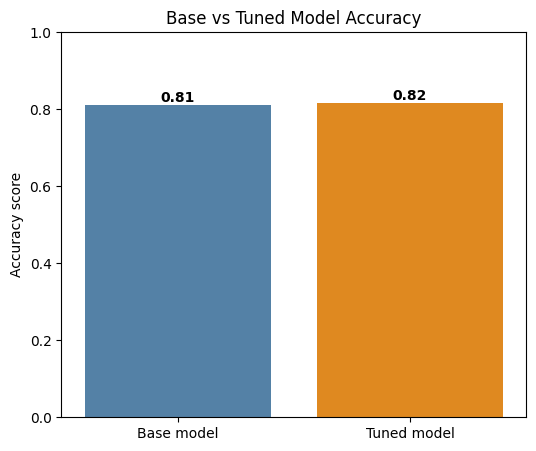

In [87]:
# Plot base vs tuned model accuracy
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=["Base model", "Tuned model"],
            y = [base_accuracy, tuned_accuracy],
            palette = ["steelblue", "darkorange"],
            hue = ["Base model", "Tuned model"],
            legend=False)
ax.bar_label(ax.containers[0], fmt = "%.2f", fontweight = "bold")
ax.bar_label(ax.containers[1], fmt = "%.2f", fontweight = "bold")
plt.title("Base vs Tuned Model Accuracy")
plt.ylim(0, 1)
plt.ylabel("Accuracy score")
plt.show()


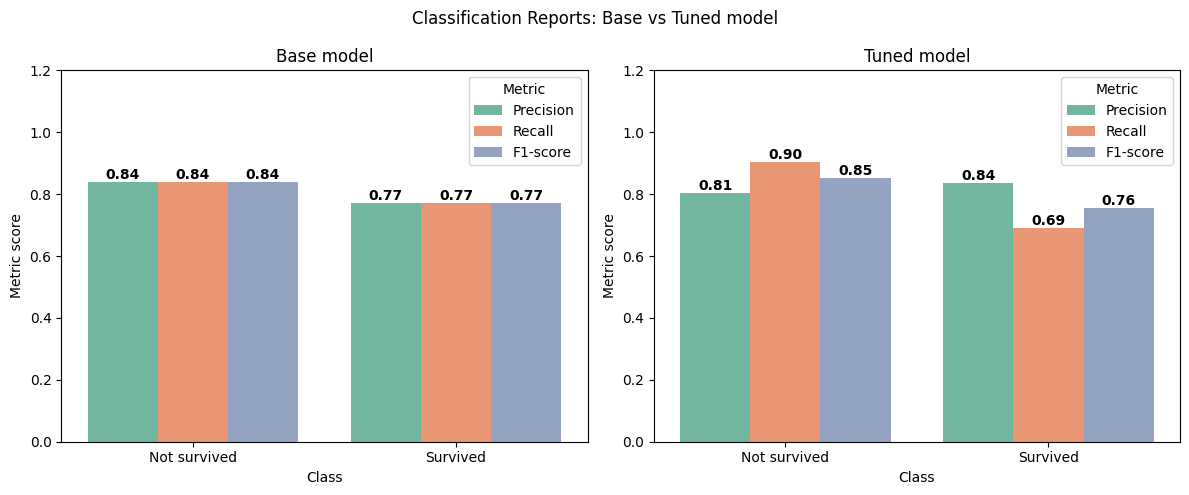

In [88]:
# Plot classification reports base vs tuned model
# Extract metrics from classification report dictionaries (create dataframe from output the metrics in dictionary)
def get_metrics(report):
    return pd.DataFrame({
        "Class": list(survival_outcome.values()) * 3,
        "Metric": ["Precision"] * len(survival_outcome) + ["Recall"] * len(survival_outcome) + ["F1-score"] * len(survival_outcome),
        "Metric score": [report["Not survived"]["precision"],
                  report["Survived"]["precision"],
                  report["Not survived"]["recall"],
                  report["Survived"]["recall"],
                  report["Not survived"]["f1-score"],
                  report["Survived"]["f1-score"]]
    })

# Plot classification reports 
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
fig.suptitle("Classification Reports: Base vs Tuned model")

# Base model
sns.barplot(data = get_metrics(base_report), x = "Class", y = "Metric score", hue = "Metric", palette = "Set2", ax = axes[0])
axes[0].set_title("Base model")
axes[0].set_ylim(0, 1.2)
metric_bars = axes[0].containers
for bar in metric_bars:
    axes[0].bar_label(bar, fmt = "%.2f", fontweight = "bold")
    
# Tuned model
sns.barplot(data = get_metrics(tuned_report), x = "Class", y = "Metric score", hue = "Metric", palette = "Set2", ax = axes[1])
axes[1].set_title("Tuned model")
axes[1].set_ylim(0, 1.2)
metric_bars = axes[1].containers
for bar in metric_bars:
    axes[1].bar_label(bar, fmt = "%.2f", fontweight = "bold")


plt.tight_layout()
plt.show()


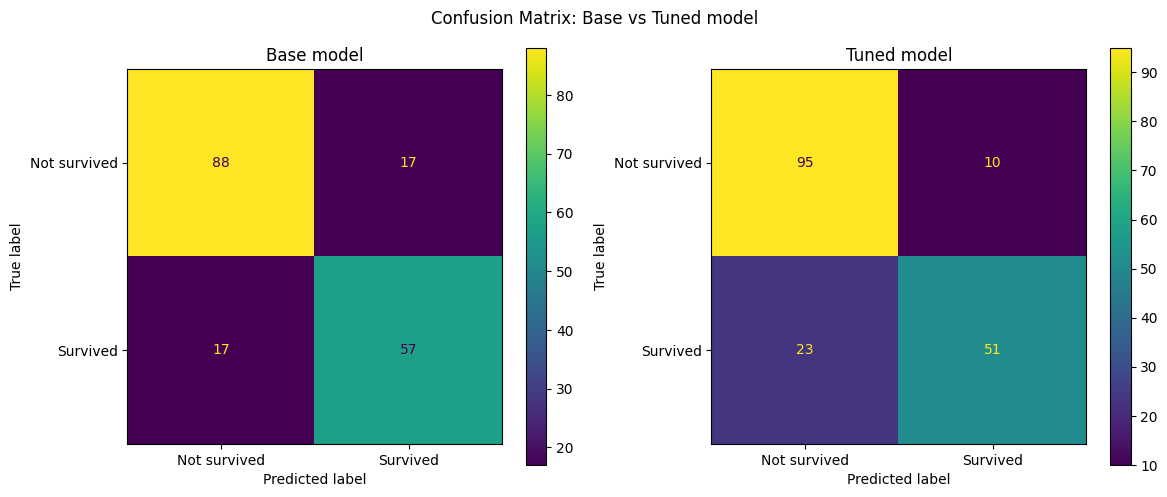

In [94]:
# Make confusion matrix base vs tuned model
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
fig.suptitle("Confusion Matrix: Base vs Tuned model")

# Base model
# Display confusion matrix for base model
titanic_rf_model_CM = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, base_y_pred), display_labels=survival_outcome.values())
titanic_rf_model_CM.plot(ax = axes[0])
axes[0].set_title("Base model")

# Tuned model
# Display confusion matrix for tuned model
best_titanic_rf_model_CM = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, tuned_y_pred), display_labels=survival_outcome.values())
best_titanic_rf_model_CM.plot(ax = axes[1])
axes[1].set_title("Tuned model")

plt.tight_layout()
plt.show()

### Get feature importance from tuned model
   - identiy which features contribute the most to the survival predicition.
   - based on historical knowledge (more like movie knowledge!), we know:
      * Women & children were prioritised
      * Children were prioritised
      * 1st class passengers get access to lifeboats first
      * Ticket class and cabin locatian correlated to ticket fare

In [41]:
# Feature importance (only from tuned model)
feature_importance = pd.Series(best_titanic_rf_model.feature_importances_,
                               index = X_train.columns).sort_values(ascending=False)

print(feature_importance)

Sex           0.487896
Fare          0.146771
Pclass        0.144789
Age           0.107501
SibSp         0.041488
Parch         0.031385
Embarked_S    0.018605
Embarked_C    0.014475
Embarked_Q    0.007091
dtype: float64


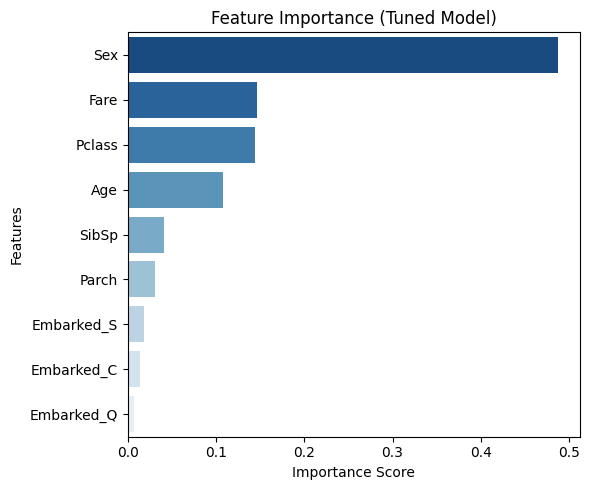

In [60]:
# Plot feature importance fro tuned model
plt.figure(figsize = (6, 5))
sns.barplot(x = feature_importance.values,
            y = feature_importance.index,
            hue = feature_importance.index,
            palette = "Blues_r",
            legend = False)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Tuned Model)")

plt.tight_layout()
plt.show()

### Generate test prediction and create submission file for Kaggle

In [102]:
# Make prediction on test data
test_prediction = best_titanic_rf_model.predict(test_df)

# Create submission dataframe
submission_df = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": test_prediction
})

# Save file to data subfolder
submission_df.to_csv("../data/submission_df.csv", index = False)

# Check file
print(submission_df.head())
print(submission_df.shape)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
(418, 2)
